# Lojistik Regresyon Projesi (Tıklamayı Tahmin Et)

Logistic Regresyon, **bir örneğin belirli bir sınıfa ait olma olasılığını** tahmin etmek için yaygın olarak kullanılır.

Bir örneğin tahmini olasılığı %50'den büyükse, model örneğin o sınıf 1'e ait olduğunu tahmin eder veya aksi takdirde olmadığını tahmin eder.

Bu onu ikili bir sınıflandırıcı yapar. Bu notebookta 'Lojistik Regresyon'un arkasındaki teoriye bakacağız ve bunu **belirli bir internet kullanıcısının bir Reklama tıklayıp tıklamadığını belirtmek için** kullanacağız.

O kullanıcının özelliklerinden yola çıkarak bir reklama tıklayıp tıklamayacağını tahmin edecek bir model oluşturmaya çalışacağız.

Bu veri seti aşağıdaki öznitelikleri içerir:

* '`Sitede Geçirilen Günlük Süre:`' dakika cinsinden tüketicinin sitede geçirdiği süre
* '`Yaş:`' yıl cinsinden müşterinin yaşı
* '`Alan Geliri:`' Tüketicinin bulunduğu coğrafi bölgesinin ortalama geliri
* '`Günlük İnternet Kullanımı:'` Günde dakika bazında tüketicinin internette harcadığı zaman
* '`Reklam Konusu Satırı:'` İlanın başlığı
* '`Şehir:'` Müşterinin bulunduğu şehir 
* '`Erkek:`' Müşterinin erkek olup olmadığı 
* '`Ülke:`' Müşterinin bulunduğu ülke
* '`Zaman Damgası:`' Tüketicinin Reklamı tıkladığı veya pencereyi kapattığı zaman
* '`Reklama Tıklandı:`' Reklamın tıklandığı 0 veya 1 olarak belirtilir

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [3]:
ROOT_DIR = "https://raw.githubusercontent.com/yapay-ogrenme/casgem-eu-project-training-on-data-mining/main/PART1/Day5-Linear_LogisticRegression/notebooks"
DATASET_PATH = ROOT_DIR + "/datasets/"

data = pd.read_csv(DATASET_PATH + 'advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 1. Exploratory Data Analysis

Text(0.5, 0, 'Age')

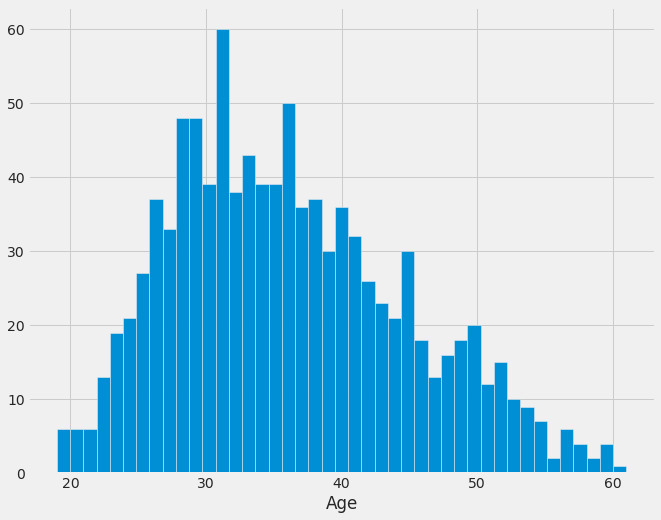

In [6]:
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

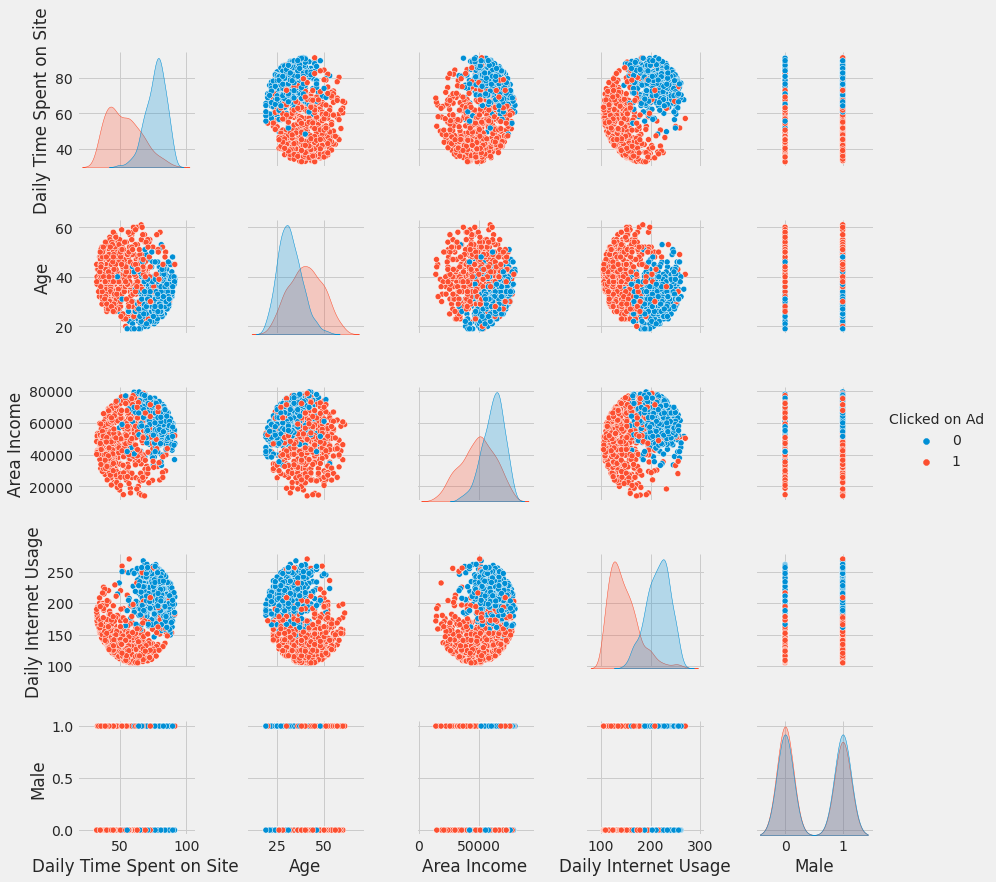

In [7]:
sns.pairplot(data, hue='Clicked on Ad')

In [8]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

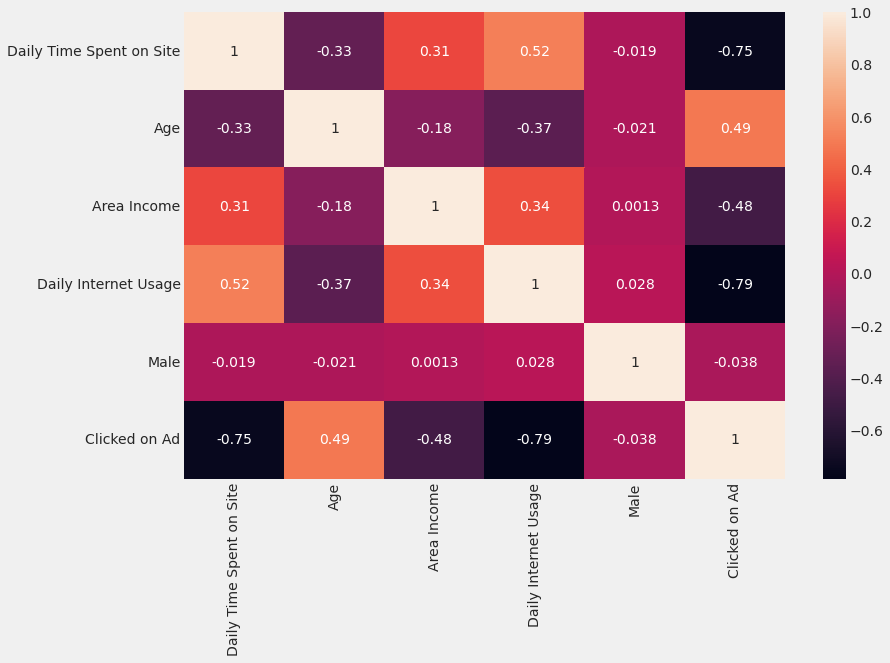

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

# 2. Lojistik Regresyonun Arkasındaki Teori

Lojistik regresyon, iki sınıflı problemler için kullanılan doğrusal sınıflandırma algoritmasıdır.
Uygulaması kolaydır, anlaşılması kolaydır ve çok çeşitli problemlerde, yöntemin verileriniz için sahip olduğu beklentiler ihlal edildiğinde bile harika sonuçlar alır.

### Açıklama

#### Lojistik Regresyon

Lojistik regresyon, yöntemin özünde kullanılan işlev olan [lojistik işlev](https://en.wikipedia.org/wiki/Logistic_function)'den yola çıkarak adlandırılmıştır.
**`Sigmoid fonksiyonu`** olarak da adlandırılan lojistik fonksiyon, istatistikçiler tarafından ekolojideki nüfus artışının özelliklerini, hızla yükselen ve çevrenin taşıma kapasitesini maksimuma çıkaran özelliklerini tanımlamak için geliştirilmiştir.

**Bu, gerçek değerli herhangi bir sayıyı alıp 0 ile 1 arasında bir değere eşleyebilen, ancak asla tam olarak bu sınırlarda olmayan S şeklinde bir eğridir.**

$$\frac{1}{1 + e^{-x}}$$

$e$, doğal logaritmaların temelidir ve $x$, lojistik işlev aracılığıyla dönüştürmek istediğiniz değerdir.


Text(0.5, 1.0, 'Sigmoid Function')

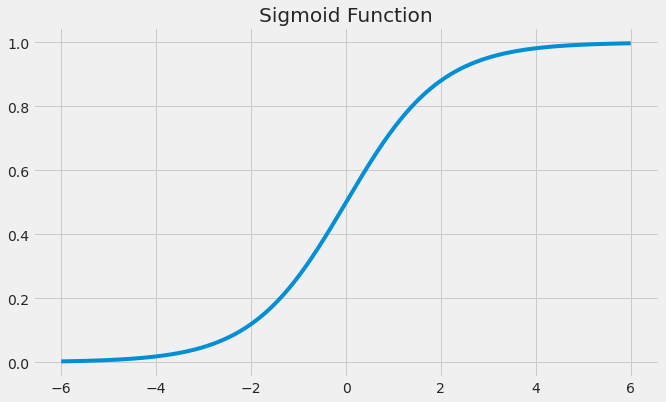

In [14]:
x = np.linspace(-6, 6, num=1000)

plt.figure(figsize=(10, 6))

plt.plot(x, (1 / (1 + np.exp(-x))))

plt.title("Sigmoid Function")

Lojistik regresyon denklemi, lineer regresyon gibi çok benzer bir temsile sahiptir. 
**Aradaki fark, modellenen çıktı değerinin doğası gereği ikili olmasıdır.**

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

veya

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ kesişim terimidir.
$\beta_1$, $x_1$ katsayısıdır.

$\hat{y}$, gerçek değeri 0 ile 1 arasında olan tahmini çıktıdır.
Bunu 0 veya 1 ikili çıktısına dönüştürmek için, bunun bir tamsayı değerine yuvarlanması veya sınıf ayrım noktasını belirtmek için bir kesme noktası sağlanması gerekir.

***
### Lojistik Regresyon Modelini Öğrenmek

Lojistik regresyon algoritmasının katsayıları (Beta değerleri b), eğitim verilerinizden tahmin edilmelidir.

Bu, [maksimum olasılık tahmini](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) kullanılarak yapılır.

Maksimum olabilirlik tahmini, çeşitli makine öğrenimi algoritmaları tarafından kullanılan yaygın bir öğrenme algoritmasıdır, ancak verilerinizin dağıtımı hakkında varsayımlarda bulunur.

En iyi katsayılar, varsayılan sınıf için 1'e çok yakın bir değer (örneğin erkek) ve diğer sınıf için 0'a çok yakın bir değer (örneğin kadın) öngören bir modelle sonuçlanacaktır. Lojistik regresyon için maksimum olasılık sezgisi, bir arama prosedürünün, model tarafından tahmin edilen olasılıklardaki hatayı verilerdekilere (örneğin, veri birincil ise 1 olasılığı) en aza indiren katsayılar (Beta değerleri) için değerler aramasıdır).

Lojistik regresyon için maksimum olasılık tahmini, bir arama prosedürünün, model tarafından tahmin edilen olasılıklardaki hatayı verilerdekilere (örneğin, veri birincil ise 1 olasılığı) en aza indiren katsayılar (Beta değerleri) için değerler aramasıdır. sınıf).Maksimum olabilirlik matematiğine girmeyeceğiz. Eğitim verileriniz için katsayılar için en iyi değerleri optimize etmek için bir minimizasyon algoritmasının kullanıldığını söylemek yeterlidir. Bu genellikle pratikte verimli sayısal optimizasyon algoritması (Quasi-newton yöntemi gibi) kullanılarak uygulanır.Lojistik öğrenirken, çok daha basit gradyan iniş algoritmasını kullanarak sıfırdan kendiniz uygulayabilirsiniz.


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

ML ön işleme için scikit-learn (pandas değil) kullanma nedenleri:

1. Tüm iş akışını çapraz doğrulayabilirsiniz (cross-validate).
2. Grid search model ve ön işleme hiperparametreleri yapabilirsiniz.
3. Kaynak DataFrame'e yeni sütunlar eklemekten kaçınır.
4. Pandas, veri sızıntısını önlemek için ayrı yerleştirme/dönüştürme adımlarından yoksundur.


**Yapılacaklar;**
1. Öznitelik değişkeni olarak 'Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City' kolonları ve hedef değişken olan 'Clicked on Ad'  haricindekileri drop ederek X öznitelik değişkeni olarak atayalım.

2. 'Clicked on Ad' hedef değişkenini y olarak atayalım.

3. Eğitim ve test kümesini %70-%30 şeklinde ayıralım.


In [16]:
from sklearn.compose import make_column_transformer

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:

num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

# https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html
ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# 3. Verileri Lojistik Regresyon İçin Hazırlayın

Verilerinizdeki dağılım ve ilişkiler hakkında lojistik regresyon tarafından yapılan varsayımlar, lineer regresyonda yapılan varsayımlarla hemen hemen aynıdır.

Bu varsayımları tanımlamak için pek çok çalışma yapılmıştır ve kesin olasılıklı ve istatistiksel dil kullanılmaktadır. Benim tavsiyem, bunları kılavuz veya temel kurallar olarak kullanmak ve farklı veri hazırlama şemalarını denemek.

Sonuç olarak, tahmine dayalı modelleme makine öğrenimi projelerinde, lazer sonuçları yorumlamak yerine doğru tahminler yapmaya odaklanıyorsunuz. Bu nedenle, model sağlam olduğu ve iyi performans gösterdiği sürece bazı varsayımları bozabilirsiniz.

- **İkili Çıktı Değişkeni (Binary Output Variable):** Bu, daha önce bahsettiğimiz gibi açık olabilir, ancak lojistik regresyon, ikili (iki sınıf) sınıflandırma problemlerine yöneliktir. 0 veya 1 sınıflandırmasına bağlanabilen varsayılan sınıfa ait bir örneğin olasılığını tahmin edecektir.

- **Gürültüyü Kaldır (Remove Noise):** Lojistik regresyon, çıktı değişkeninde (y) hata olmadığını varsayar, eğitim verilerinizden aykırı değerleri ve muhtemelen yanlış sınıflandırılmış örnekleri kaldırmayı düşünün.

- **Gauss Dağılımı (Gaussian Distribution):** Lojistik regresyon, doğrusal bir algoritmadır (çıktıda doğrusal olmayan bir dönüşümle). Girdi değişkenleri ile çıktı arasında doğrusal bir ilişki olduğunu varsayar. Bu doğrusal ilişkiyi daha iyi ortaya çıkaran girdi değişkenlerinizin veri dönüşümleri, daha doğru bir modelle sonuçlanabilir. Örneğin, bu ilişkiyi daha iyi ortaya çıkarmak için log, root, Box-Cox ve diğer tek değişkenli dönüşümleri kullanabilirsiniz.

- **İlgili Girdileri Kaldırın (Remove Correlated Inputs):** Doğrusal regresyon gibi, yüksek düzeyde ilişkili birden fazla girdiniz varsa model fazla sığabilir. Tüm girdiler arasındaki ikili korelasyonları hesaplamayı ve yüksek korelasyonlu girdileri kaldırmayı düşünün.

- **Fail to Converge:** Katsayıları öğrenen beklenen olabilirlik tahmin sürecinin yakınsayamaması mümkündür. Bu, verilerinizde yüksek düzeyde ilişkili girdiler varsa veya veriler çok seyrekse (örneğin, girdi verilerinizde çok sayıda sıfır varsa) olabilir.


# 4. Scikit-Learn'de Lojistik Regresyon Uygulaması

sklearn'un LogisticRegression() ile solver hiperparametresini "liblinear" şeklinde atayarak model eğitimini yapınız. 

Ve yukarıda kendimizin tanımlamış olduğu print_score() fonksiyonunu kullanarak eğitim ve test başarımlarımızı yazdırınız.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

RandomForestClassifier() modelini kullanarak eğitim yapınız ve yukarıda kendimizin tanımlamış olduğu print_score() fonksiyonunu kullanarak eğitim ve test başarımlarımızı yazdırınız.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy Score: 95.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945946    0.960526  0.953333    0.953236      0.953431
recall       0.958904    0.948052  0.953333    0.953478      0.953333
f1-score     0.952381    0.954248  0.953333    0.953315      0.953340
support    146.000000  154.000000  0.953333  300.000000    300.000000
_______________________________________________

# 5. Performans ölçümü

#### 1. Confusion Matrix
- Her satır: gerçek sınıf
- Her sütun: tahmini sınıf

İlk satır: Tıklanmayan Reklamlar, negatif sınıf:
* 143 tane Tıklanmayan Reklamlar olarak doğru bir şekilde sınıflandırıldı. **Gerçek olumsuzlar (True negatives)**.
* Kalan 6 tanesi yanlışlıkla tıklanan Reklamlar olarak sınıflandırıldı. **Yanlış pozitif (False positive)**

İkinci satır: Tıklanan Reklamlar, pozitif sınıf:
* 3 tanesi yanlışlıkla Tıklanmayan Reklamlar olarak sınıflandırıldı. **Yanlış negatifler (False negatives)** 
* 146 tanesi tıklanan Reklamlar doğru sınıflandırılmıştır. **Gerçek pozitifler (True positives)**


#### 2. Kesinlik (Precision)

**Kesinlik (Precision)** olumlu tahminlerin doğruluğunu ölçer. Sınıflandırıcının`kesinliği (precision)` of the classifier ==> `98.01%`

$$\textrm{kesinlik (precision)} = \frac{\textrm{Gercek pozitifler (True Positives)}}{\textrm{Gercek pozitifler (True Positives)} + \textrm{Yanlis pozitif (False positive)}}$$


#### 3. Duyarlılık (Recall)

`Kesinlik (Precision)` is typically used with `recall` (`Hassasiyet` or `Gerçek Pozitif Oranı`). 
Sınıflandırıcı tarafından doğru bir şekilde tespit edilen pozitif örneklerin oranı.


$$\textrm{Duyarlilik (Recall)} = \frac{\textrm{Gercek pozitifler (True Positives)}}{\textrm{Gercek pozitifler (True Positives)} + \textrm{Yanlis negatif (False negatives}}$$ ==> `96.10%`

#### 4. F1 Puanı (F1 Score)

$F_1$ puanı, kesinlik ve duyarlılığın harmonik ortalamasıdır. Normal ortalama, tüm değerlere eşit ağırlık verir. Harmonik ortalama, düşük değerlere daha fazla ağırlık verir.


$$F_1=\frac{2}{\frac{1}{\textrm{kesinlik (Precision)}}+\frac{1}{\textrm{Duyarlilik (Recall)}}}=2\times \frac{\textrm{Kesinlik (Precision)}\times \textrm{Duyarlilik (Recall)}}{\textrm{kesinlik (Precision)}+ \textrm{Duyarlilik (Recall)}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ ==> `97.05%`

$F_1$ puanı, benzer kesinliğe ve duyarlılığa sahip sınıflandırıcıları tercih eder.

#### 5. Kesinlik (Precision) / Duyarlılık (Recall) Dengesi

Artan kesinlik (Precision), duyarlılık (Recall)'ı azaltır (veya tam tersi)



## The Receiver Operating Characteristics (ROC) Curve

ROC eğrisi, kesinliğe(precision) karşı duyarlılığa(recall) çizmek yerine, `yanlış pozitif oran (false positive rate)`a karşı `gerçek pozitif oranı (true positive rate)` çizer. ` Yanlış pozitif oran (false positive rate-FPR)`, hatalı olarak pozitif olarak sınıflandırılan negatif örneklerin oranıdır. Bir eksi, doğru bir şekilde negatif olarak sınıflandırılan negatif örneklerin oranı olan `gerçek negatif oran (true negative rate-TNR)` a eşittir.

TNR'ye `özgüllük (specificity)` de denir. Dolayısıyla, ROC eğrisi, "1 - `özgüllük (specificity)`e karşı `sensitivity` (recall) grafiğini çizer.


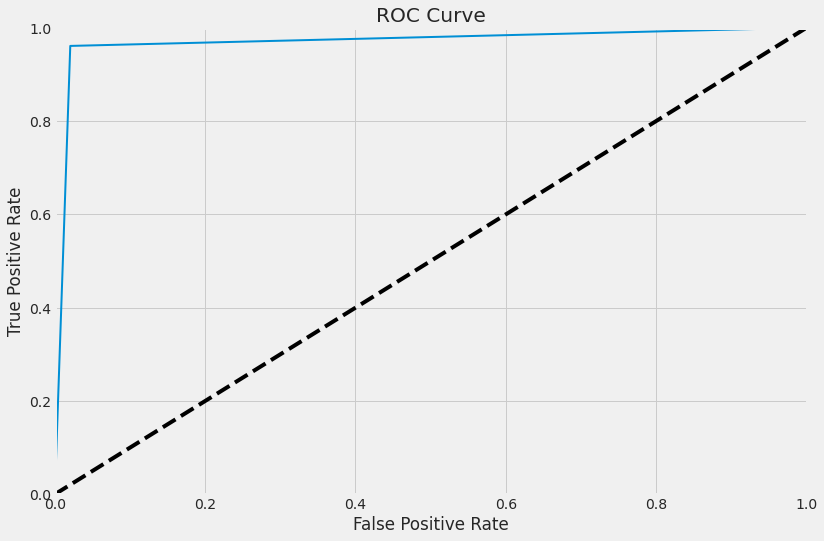

In [24]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9702455079167409

**Pozitif sınıf nadir olduğunda (positive class is rare)** veya yanlış pozitifleri (false positives) yanlış negatiflerden (false negatives) daha fazla önemsediğinizde PR eğrisini kullanın.
​
**Negatif sınıf nadir olduğunda** veya yanlış pozitiflerden (false positives) çok yanlış negatifleri (false negatives) önemsediğinizde ROC eğrisini kullanın
​
​
Yukarıdaki örnekte, ROC eğrisi, sınıflandırıcının iyi olduğunu gösteriyor gibiydi. Ancak, PR eğrisine baktığınızda, iyileştirme için yer olduğunu görebilirsiniz.


# 6. Lojistik Regresyon Hiperparametre ayarı

In [26]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 14 332]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953642    0.986577      0.97    0.970110      0.970549
recall       0.986301    0.954545      0.97

# 7. Özet

Bu notebookta, makine öğrenimi ve tahmine dayalı modelleme için lojistik regresyon algoritmasını keşfettiniz. Çok yol kat ettiniz ve şunları öğrendiniz:

- Lojistik fonksiyonun ne olduğu ve lojistik regresyonda nasıl kullanıldığı
- Lojistik regresyondaki anahtar temsilin, tıpkı lineer regresyon gibi katsayılar olduğu
- Lojistik regresyondaki katsayıların, maksimum olabilirlik tahmini adı verilen bir süreç kullanılarak tahmin edilmesi
- Lojistik regresyon kullanarak tahmin yapmak o kadar kolay ki, bunu excel'de yapabilirsiniz
- Lojistik regresyon için veri hazırlamanın lineer regresyona çok benzemesi
- Bir makine öğrenimi sınıflandırma problemi nasıl değerlendirilir
- Lojistik regresyon hiper parametreleri nasıl ayarlanır


## References:
- [Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)